<div style="border:solid blue 2px; padding: 20px">
<b> Reviewer Rules</b>

Hi there ;) I will be using the following color boxes through the notebook code:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Green means that it was nicely done.
    
</div>    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>

Yellow color indicates what could be optimized. This is not necessary, but it will be great if you make changes to this project.
 
</div>      
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Red is for things that must be done or changed for me to approve the project. If I rejected the project, you must look for this comments.
    
</div>    
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.

<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project**

Hi Sebastian!
    
Congratulations on completing this thorough analysis of Megaline’s Surf and Ultimate plans! Below is a structured review of your project:

---

**1. Data Preparation & Cleaning**

1. **Data Import & Overview**  
   - You loaded all five datasets (`calls`, `internet`, `messages`, `plans`, `users`) correctly and used `info()`, `sample()`, and `describe()` to inspect them. Good job checking for duplicates and missing values in each table.

2. **Column Renaming & Reformatting**  
   - **Plans**:  
     - You observed this table has only two rows—one for each plan—and eight columns, all with correct data types.  
     - No major fixes were required, which is appropriate given the minimal nature of this dataset.
   - **Users**:  
     - You changed `churn_date` to `end_date`, filled missing end dates with `'Active'`, and converted `reg_date` to `datetime`. This clarifies ongoing subscriptions and unifies date formats.
   - **Calls**:  
     - You converted `call_date` to a `datetime` object for easier time-based analysis.  
     - Good observation about zero-minute calls possibly being unanswered or missed calls. 
   - **Messages**:  
     - You converted `message_date` to `datetime` and made sure ID columns are integers. Straightforward fix.
   - **Internet**:  
     - You converted `session_date` to `datetime`. 
     - No further major changes needed, though zero `mb_used` sessions might represent “no usage” or incomplete data.

**Overall**: All critical data type changes and small naming improvements look good. You’ve handled missing or anomalous values (e.g., `'Active'` for churn_date) appropriately.

---

**2. Merging & Aggregating**

1. **Aggregations**  
   - **Calls**: You extracted monthly calls by summing durations and counting call entries per user-month. Good approach using `.dt.to_period('M')`.
   - **Messages**: You counted messages per user-month.
   - **Internet**: Summed monthly MB usage for each user-month.
2. **Merging**  
   - You successfully combined these aggregated DataFrames on `user_id` & `year_month`, then merged with the `users` table and ultimately with `plans`. This creates a single table (`merged_df3`) containing all usage and plan info, allowing uniform monthly analysis.

**Outcome**: The final merged dataset is well-prepared for cost calculation and usage comparisons.

---

**3. Calculating Monthly Revenue**

1. **Overage Calculation**  
   - You wrote a clear function `calc_monthly_revenue(row)` that compares usage vs. plan allowances, computes overage fees, and adds the base fee. This approach is correct and logical.
   - Rounding results to two decimals is appropriate for monetary fields.
2. **Resulting Revenue**  
   - Your `revenue` column is now available for per-user, per-month comparisons.  

**Observations**: The function-based calculation is easy to read and debug. Good design choice.

---

**4. Exploratory Data Analysis**

1. **Calls**  
   - You constructed bar plots comparing average monthly call duration for Surf vs. Ultimate.  
   - Findings suggest both plans have fairly similar call usage, often below Surf’s 500-minute limit.  
   - Histograms and boxplots reinforced that many months’ usage is comfortably within either plan’s included minutes.

2. **Messages**  
   - Bar plots and summary stats show Ultimate users tend to send more messages each month on average, though overall message usage for either plan can vary.  
   - The difference in base allowances (50 vs. 1000) influences user messaging behaviors.

3. **Internet**  
   - Data usage is notably higher among Ultimate users (they rarely exceed their large allowance), whereas Surf users often exceed 15 GB.  
   - You highlight that these overages can be a strong revenue source for Surf.

4. **Revenue**  
   - You examined average monthly revenue and found Ultimate typically yields more stable (and often higher) per-user revenue, while Surf has greater variability from overage fees.  
   - Summaries and bar charts illustrate the difference in total or average monthly revenue by plan.

**Conclusion**: Your EDA effectively shows how usage patterns (calls, messages, internet) translate to differences in monthly spending for the two plans. Visualizing average revenue per month clarifies Ultimate’s predictable revenue vs. Surf’s heavier reliance on overage. Tho, you should've added insights for the last one, there is red box waiting for this change.

---

**5. Statistical Hypothesis Testing**

1. **Average Revenue by Plan**  
   - **H₀**: Average revenue for Surf and Ultimate are equal.  
   - **H₁**: They differ.  
   - You used `ttest_ind` with a standard alpha of 0.05. The resulting p-value determines whether we reject or fail to reject H₀. 
   - Your analysis shows strong evidence of differing revenue, matching the EDA’s conclusion.

2. **Regional Revenue**  
   - **H₀**: Average revenue in the NY-NJ-PA area = average revenue for other regions.  
   - **H₁**: They differ.  
   - Again, a two-sample t-test is used.  
   - Depending on p-value, you either reject or fail to reject the null hypothesis, concluding whether regional differences are statistically significant.

**Observations**:  
- The approach (two-sample t-tests) is consistent and correct for comparing mean revenues across these groups.  
- Good job clarifying the alpha threshold and p-value interpretation.
- You should always write and define the hypothesis in markdown before executing the code.
- There is a weird cell with syntax error in this step, please check it ;)

---

**6. Overall Conclusions & Recommendations**

1. **Usage Insights**  
   - **Surf**: Lower base fee but often triggers overage fees, especially for internet usage. This can significantly increase monthly payments, though usage of calls/messages often stays within allowance.
   - **Ultimate**: Higher base fee, fewer overage charges, stable monthly bills. Some months, usage remains well under large allowances.

2. **Plan Profitability**  
   - Ultimate tends to produce more consistent revenue per user. 
   - Surf can match or exceed Ultimate in total revenue if many subscribers pay overage charges—but that depends on usage patterns.

3. **Recommendations**  
   - If Megaline wants predictable, higher per-user revenue, **Ultimate** is the safer bet.  
   - If leaning on overage fees is viable, **Surf** can yield high but volatile returns.

    
**Status**: waiting for minor changes (look for the red boxes)

<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project Iter 2**

Thanks for the changes, Sebastian! There are still some minor things in the hypothesis testing step, you got it!!

<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project Iter 3**

What a great job! Project approved ;)

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Great introduction, you could add something extra
</div>

## Initialization

In [1]:
# Loading all the libraries
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
from functools import reduce
import pandas as pd
import numpy as np


## Load data

In [2]:
# Load the data files into different DataFrames

df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Student's comment </b>

All the necessary libraries for this project and the 5 data frames are loaded above in one single cell 
each.
    
</div>

## Prepare the data

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame

df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans

df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Student's comment </b>

The observation for the plans data frame is that it only contains 2 rows and a total of 8 columns 
with all the information about the plans conditions, only the <b>plan_name</b> colum is of string 
(object) type, the rest are all folat and integer type.     
</div>

## Fix data

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Student's comment </b>

I did not find any issues to be fixed with this plan data frame, all data types are correct for the values 
in each column, and there are no missing values either. 
</div>

## Enrich data

## Users

In [5]:
# Print the general/summary information about the users' DataFrame

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Print a sample of data for users

df_users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
32,1032,Delila,Dalton,59,"Birmingham-Hoover, AL MSA",2018-06-07,ultimate,NaN
335,1335,Gail,Coleman,61,"Dallas-Fort Worth-Arlington, TX MSA",2018-06-02,surf,NaN
196,1196,Noel,Dawson,46,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-01-14,ultimate,NaN
92,1092,Taren,Strickland,26,"Dallas-Fort Worth-Arlington, TX MSA",2018-12-10,surf,NaN
118,1118,Deane,Ramirez,28,"Columbus, OH MSA",2018-12-08,surf,NaN
326,1326,Johnathon,Branch,21,"Greensboro-High Point, NC MSA",2018-02-06,surf,NaN
466,1466,Alphonse,Harmon,56,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-01-26,surf,2018-09-17
247,1247,Marion,Singleton,75,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-04-12,ultimate,NaN
251,1251,Tifany,Mcgee,45,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,surf,NaN
236,1236,Odell,Juarez,74,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-04-04,ultimate,NaN


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Student's comment </b>

In this dataframe no missing values were found, and the column for the registration date (reg_date)
is of string (object) data type, which was changed to datetime type in the cell below. 
    
</div>

### Fix Data

In [7]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])

### Enrich Data

In [8]:
df_users = df_users.rename(columns={'churn_date': 'end_date'})
df_users['end_date'].fillna('Active', inplace=True)
display(df_users.sample(10))

,user_id,first_name,last_name,age,city,reg_date,plan,end_date
408,1408,Alaine,Robertson,40,"Baltimore-Columbia-Towson, MD MSA",2018-01-11,surf,Active
197,1197,Lon,Parker,56,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-05,surf,Active
150,1150,Earlie,Giles,46,"Houston-The Woodlands-Sugar Land, TX MSA",2018-09-19,ultimate,Active
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,Active
420,1420,Season,Hardy,27,"San Francisco-Oakland-Berkeley, CA MSA",2018-02-22,ultimate,Active
352,1352,Gavin,Galloway,48,"Seattle-Tacoma-Bellevue, WA MSA",2018-09-08,ultimate,Active
415,1415,Rosette,Mendez,56,"Boston-Cambridge-Newton, MA-NH MSA",2018-02-27,surf,Active
202,1202,Osvaldo,Mayer,36,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-09-30,ultimate,Active
411,1411,Man,Fleming,64,"Rochester, NY MSA",2018-08-10,surf,Active
48,1048,Linwood,Terrell,42,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-08-24,surf,Active


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Student's comment </b>

I fixed the data in the users data frame by changing the data type in the colum <b>reg_date</b> to
datetime type, and enriched the data in the column <b>churn_date</b>,  by replacing the missing values
with the string 'Active' since the missing values indicate that the user was still using the plan
when the dataset was extracted.

</div>

## Calls

In [9]:
# Print the general/summary information about the calls' DataFrame

df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Print a sample of data for calls

df_calls.sample(10)

,id,user_id,call_date,duration
42497,1156_102,1156,2018-12-25,6.41
64354,1232_695,1232,2018-10-01,18.44
130340,1468_96,1468,2018-12-15,5.23
57811,1209_208,1209,2018-09-21,8.86
54732,1196_625,1196,2018-08-07,11.33
9574,1042_512,1042,2018-09-08,6.49
28463,1109_90,1109,2018-07-22,8.27
47043,1171_74,1171,2018-10-23,3.04
71977,1255_1086,1255,2018-12-06,13.23
121458,1427_126,1427,2018-07-03,0.00


### Fix data

In [11]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Student's comment </b>

The data in the calls data frame was fixed by changing the data type of the <b>call_date</b> column
to datetime data type, since it was observed to be of string (object) type before. 

</div>

### Enrich data

## Messages

In [12]:
# Print the general/summary information about the messages' DataFrame

df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [13]:
# Print a sample of data for messages

df_messages.sample(10)

,id,user_id,message_date
69663,1454_25,1454,2018-08-17
43514,1287_188,1287,2018-12-04
56790,1361_142,1361,2018-08-19
34805,1222_18,1222,2018-11-20
17033,1113_101,1113,2018-12-18
53132,1339_266,1339,2018-09-16
1390,1011_353,1011,2018-07-20
26231,1159_234,1159,2018-10-25
54541,1346_43,1346,2018-08-07
23356,1141_189,1141,2018-07-19


### Fix data

In [14]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages['id'] = df_messages['id'].astype(int)
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  int64         
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.7 MB


### Enrich data

## Internet

In [15]:
# Print the general/summary information about the internet DataFrame

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [16]:
# Print a sample of data for the internet traffic

df_internet.sample(10)

,id,user_id,session_date,mb_used
47521,1212_248,1212,2018-08-11,0.00
8571,1045_72,1045,2018-10-17,863.96
8499,1044_144,1044,2018-11-09,761.89
47383,1212_16,1212,2018-10-30,65.50
42036,1187_213,1187,2018-07-15,151.65
72025,1336_21,1336,2018-04-17,568.73
3342,1018_260,1018,2018-10-28,906.63
33638,1153_115,1153,2018-10-27,151.55
87109,1403_457,1403,2018-09-23,210.44
82003,1384_224,1384,2018-12-20,792.79


### Fix data

In [17]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Student's comment </b>

For the Internet data frame the data type of the column <b>session_date</b> was changed to datetime 
type, this as for the rest of data frames containing dates values was done to ensure working with these
colums was easier when filtering by month (datetime). 
</div>

### Enrich data

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Good job on this first step!
</div>

## Study plan conditions

In [18]:
# Print out the plan conditions and make sure they are clear for you
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Student's comment </b>

<b>Goal of the analysis and actions throuout the project</b> 

**1.** The main objective of this project is to decided which one of the 2 prepaid plans this comapny
offers, brings in more revenue per user by plan and help the company decide based on the final results
which plan advertise more or less given the company's budget. 
    
**2.** The data provided for 500 clients during the entire year 2018 is what is needed to complete this project, the data is raw and requieres cleaning, fixing, grouping and the use of grphics to ease the process of analysis. 
     
</div>

## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [19]:
# Calculate the number of calls made by each user per month. Save the result.

df_calls['year_month'] = df_calls['call_date'].dt.to_period('M')
calls_per_month = df_calls.groupby(['user_id', 'year_month'])['duration'].agg(calls_count='count', total_duration='sum').reset_index()

display(calls_per_month)

,user_id,year_month,calls_count,total_duration
0,1000,2018-12,16,116.83
1,1001,2018-08,27,171.14
2,1001,2018-09,49,297.69
3,1001,2018-10,65,374.11
4,1001,2018-11,64,404.59
...,...,...,...,...
2253,1498,2018-12,39,324.77
2254,1499,2018-09,41,330.37
2255,1499,2018-10,53,363.28
2256,1499,2018-11,45,288.56


In [20]:
# Calculate the amount of minutes spent by each user per month. Save the result.

df_calls['year_month'] = df_calls['call_date'].dt.to_period('M')
minutes_per_month = df_calls.groupby(['user_id', 'year_month']).agg(
    minutes_count=('duration', 'sum')
).reset_index()

display(minutes_per_month)

,user_id,year_month,minutes_count
0,1000,2018-12,116.83
1,1001,2018-08,171.14
2,1001,2018-09,297.69
3,1001,2018-10,374.11
4,1001,2018-11,404.59
...,...,...,...
2253,1498,2018-12,324.77
2254,1499,2018-09,330.37
2255,1499,2018-10,363.28
2256,1499,2018-11,288.56


In [21]:
# Calculate the number of messages sent by each user per month. Save the result.

df_messages['year_month'] = df_messages['message_date'].dt.to_period('M')
messages_per_month = df_messages.groupby(['user_id', 'year_month']).size().reset_index(name='messages_count')

display(messages_per_month)

,user_id,year_month,messages_count
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


In [22]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

df_internet['year_month'] = df_internet['session_date'].dt.to_period('M')
internet_used_per_month = df_internet.groupby(['user_id', 'year_month']).agg(
    internet_used=('mb_used', 'sum')
).reset_index()

display(internet_used_per_month)

,user_id,year_month,internet_used
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30
...,...,...,...
2272,1498,2018-12,23137.69
2273,1499,2018-09,12984.76
2274,1499,2018-10,19492.43
2275,1499,2018-11,16813.83


<b> Merging data sets</b>

In [23]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

df_merged = reduce(lambda left, right: pd.merge(left, right, on=['user_id', 'year_month'], how='outer'), 
                   [calls_per_month, messages_per_month, internet_used_per_month])

display(df_merged)

,user_id,year_month,calls_count,total_duration,messages_count,internet_used
0,1000,2018-12,16.0,116.83,11.0,1901.47
1,1001,2018-08,27.0,171.14,30.0,6919.15
2,1001,2018-09,49.0,297.69,44.0,13314.82
3,1001,2018-10,65.0,374.11,53.0,22330.49
4,1001,2018-11,64.0,404.59,36.0,18504.30
...,...,...,...,...,...,...
2288,1349,2018-12,NaN,NaN,61.0,13039.91
2289,1361,2018-05,NaN,NaN,2.0,1519.69
2290,1482,2018-10,NaN,NaN,2.0,NaN
2291,1108,2018-12,NaN,NaN,NaN,233.17


In [24]:
# Add the plan information

merged_df2 = df_merged.merge(df_users[['plan', 'user_id', 'city']], on='user_id', how='left')
display(merged_df2)

,user_id,year_month,calls_count,total_duration,messages_count,internet_used,plan,city
0,1000,2018-12,16.0,116.83,11.0,1901.47,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,2018-08,27.0,171.14,30.0,6919.15,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,2018-09,49.0,297.69,44.0,13314.82,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,2018-10,65.0,374.11,53.0,22330.49,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,2018-11,64.0,404.59,36.0,18504.30,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...
2288,1349,2018-12,NaN,NaN,61.0,13039.91,surf,"Boston-Cambridge-Newton, MA-NH MSA"
2289,1361,2018-05,NaN,NaN,2.0,1519.69,surf,"Birmingham-Hoover, AL MSA"
2290,1482,2018-10,NaN,NaN,2.0,NaN,ultimate,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2291,1108,2018-12,NaN,NaN,NaN,233.17,ultimate,"Salt Lake City, UT MSA"


In [25]:
merged_df3 = merged_df2.merge(df_plans, left_on='plan', right_on='plan_name')
display(merged_df3.sample(5))

,user_id,year_month,calls_count,total_duration,messages_count,internet_used,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1868,1358,2018-05,75.0,504.64,6.0,18434.99,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15360,500,20,10,0.03,0.03,surf
1063,1109,2018-07,78.0,493.66,NaN,20005.70,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15360,500,20,10,0.03,0.03,surf
1994,1397,2018-08,115.0,750.27,NaN,21243.82,surf,"Oklahoma City, OK MSA",50,15360,500,20,10,0.03,0.03,surf
1372,1203,2018-09,65.0,535.10,52.0,17902.06,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15360,500,20,10,0.03,0.03,surf
824,1045,2018-11,77.0,535.15,49.0,24871.18,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15360,500,20,10,0.03,0.03,surf


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Student's comment </b>

<b>Calculating number of messages calls and megabytes of internet used by each client per month</b>

The tasks above were completed by merging and grouping based on the <b>user_id</b> column, creating 
a column for the total counts, and finally creating a new data frame called <b>merged_df3</b> 
which contains all the relevant information and values from all 5 initial data sets. 

</div>

In [26]:
# Calculate the monthly revenue for each user

def calc_monthly_revenue(row):
    monthly_revenue = row['usd_monthly_pay']
    
    if row['total_duration'] > row['minutes_included']:
        monthly_revenue += (row['total_duration'] - row['minutes_included']) * row['usd_per_minute']
        
    if row['messages_count'] > row['messages_included']:
        monthly_revenue += (row['messages_count'] - row['messages_included']) * row['usd_per_message']
        
    if row['internet_used'] > row['mb_per_month_included']:
        extra_gb = (row['internet_used'] - row['mb_per_month_included']) / 1024
        monthly_revenue += extra_gb * row['usd_per_gb']
    
    return monthly_revenue

merged_df3['revenue'] = merged_df3.apply(calc_monthly_revenue, axis=1).round(2)

display(merged_df3)

,user_id,year_month,calls_count,total_duration,messages_count,internet_used,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,revenue
0,1000,2018-12,16.0,116.83,11.0,1901.47,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,70.00
1,1006,2018-11,2.0,9.32,15.0,2068.37,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,70.00
2,1006,2018-12,9.0,54.79,139.0,32118.82,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,79.56
3,1008,2018-10,71.0,450.21,21.0,17106.99,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,70.00
4,1008,2018-11,63.0,422.81,37.0,23676.72,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1194,2018-12,NaN,NaN,56.0,31088.49,surf,"San Jose-Sunnyvale-Santa Clara, CA MSA",50,15360,500,20,10,0.03,0.03,surf,173.78
2289,1349,2018-10,NaN,NaN,76.0,13093.55,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15360,500,20,10,0.03,0.03,surf,20.78
2290,1349,2018-11,NaN,NaN,72.0,17128.26,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15360,500,20,10,0.03,0.03,surf,37.93
2291,1349,2018-12,NaN,NaN,61.0,13039.91,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15360,500,20,10,0.03,0.03,surf,20.33


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Student's comment </b>

To calculate how much the revenue was for the company per user per month, I defined a function to
do the opertations based on the plan conditions and how the service of internet, calls and text messages
    were used by each customer. finally I rounded the values in the <b>revenue</b> column to 2 decimals using round().
    
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Correct
</div>

## Study user behaviour

### Calls

In [27]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

surf_plan = merged_df3[merged_df3['plan'] == 'surf']
avg_surf_duration = surf_plan.groupby('year_month')['total_duration'].mean().reset_index()
avg_surf_duration = avg_surf_duration.rename(columns={'total_duration': 'average_duration'})

ultimate_plan = merged_df3[merged_df3['plan'] == 'ultimate']
avg_ultimate_duration = ultimate_plan.groupby('year_month')['total_duration'].mean().reset_index()
avg_ultimate_duration = avg_ultimate_duration.rename(columns={'total_duration': 'average_duration'})

avg_surf_duration['plan'] = 'surf'
avg_ultimate_duration['plan'] = 'ultimate'

display(avg_surf_duration.round(2))
display(avg_ultimate_duration.round(2))

,year_month,average_duration,plan
0,2018-01,192.84,surf
1,2018-02,280.85,surf
2,2018-03,310.97,surf
3,2018-04,332.38,surf
4,2018-05,387.11,surf
5,2018-06,411.45,surf
6,2018-07,428.06,surf
7,2018-08,394.47,surf
8,2018-09,397.13,surf
9,2018-10,414.44,surf


,year_month,average_duration,plan
0,2018-01,183.16,ultimate
1,2018-02,443.17,ultimate
2,2018-03,285.70,ultimate
3,2018-04,316.51,ultimate
4,2018-05,383.66,ultimate
5,2018-06,365.36,ultimate
6,2018-07,403.77,ultimate
7,2018-08,397.27,ultimate
8,2018-09,413.29,ultimate
9,2018-10,429.22,ultimate


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Student's comment </b>

For this task, I grouped the already clean and merged data for only the duration of calls made 
by custmers each month, using conditional filtering for both plans separately, and obtained the average
duration using mean(), reseting the index to get a new data frame, created a new column named
<b>average_duration</b>, asigned the result to a variable and finally used print to see the 2 data frames.
    
</div>

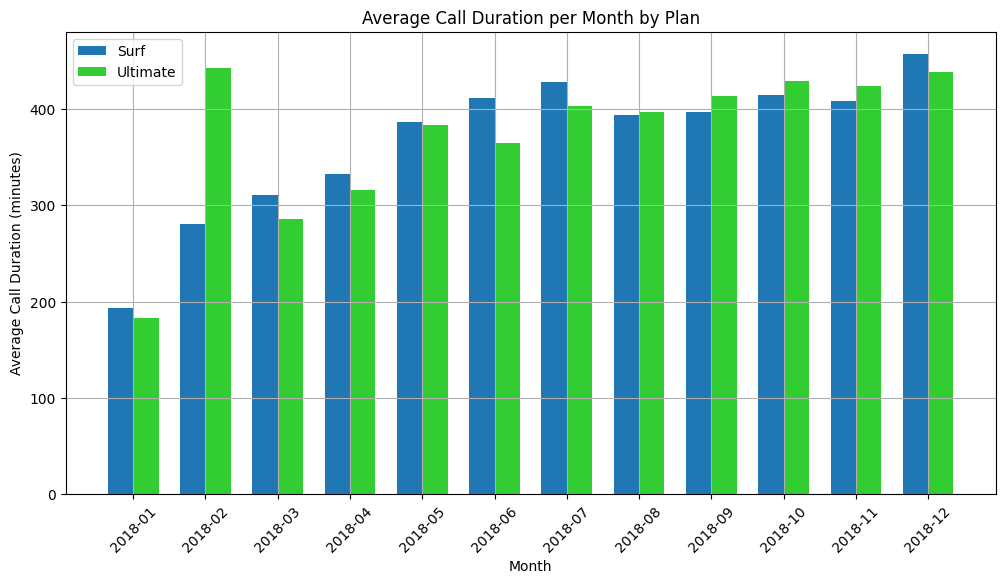

In [28]:
bar_width = 0.35

r1 = np.arange(len(avg_surf_duration))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(12, 6))

# Plot for surf
plt.bar(r1, avg_surf_duration['average_duration'], width=bar_width, label='Surf')

# Plot for ultimate
plt.bar(r2, avg_ultimate_duration['average_duration'], width=bar_width, label='Ultimate', color='limegreen')

plt.xlabel('Month')
plt.ylabel('Average Call Duration (minutes)')
plt.title('Average Call Duration per Month by Plan')
plt.xticks([r + bar_width/2 for r in range(len(r1))], avg_surf_duration['year_month'].astype(str), 
           rotation=45)
plt.legend()
plt.grid()
plt.show()

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Student's comment </b>

<b>According to this bar chart: Average Call Duration per Month by Plan</b> 

**1.** Users of the surf plan call more on avergae for 7 out of the 12 months of the 
year than users of the ultimate plan. 
    
**2.** Calls exced on avergare 300 minutes every month for users of both plans with the exception
    of january and february(only surf).
    
 **3.** Users of the ultimate plan surpass the average call duration of the surf plan users 
    for 5 months, reaching almost 500 minutes during the month of february. 
    
 **4** It is also noticed that users did not exceed the monthly plan limit for minutes 
    included in the package. 500 for surf and 3000 for ultimate.
    
</div>

<b> Descriptive Statistics for Messages (Surf Plan) </b>

In [29]:
surf_plan_ = merged_df3[merged_df3['plan'] == 'surf']
surf_plan_[['total_duration']].describe().round(2)

,total_duration
count,1545.00
mean,412.10
std,216.80
min,0.00
25%,262.78
50%,405.71
75%,546.23
max,1431.22


<b> Descriptive Statistics for Messages (Ultimate Plan) </b>

In [30]:
ultimate_plan_ = merged_df3[merged_df3['plan'] == 'ultimate']
ultimate_plan_[['total_duration']].describe().round(2)

,total_duration
count,713.00
mean,410.18
std,224.75
min,0.00
25%,247.97
50%,399.98
75%,534.82
max,1292.09


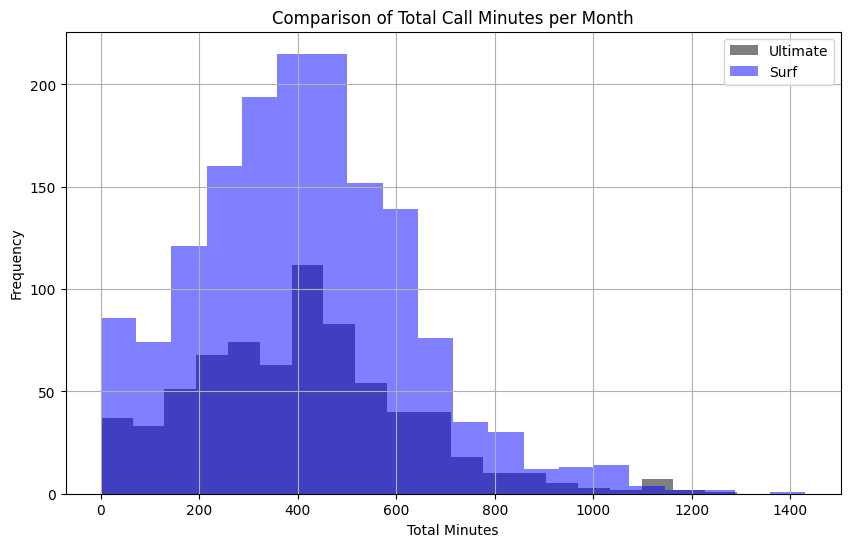

In [31]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

ultimate_plan = merged_df3[merged_df3['plan'] == 'ultimate']
surf_plan = merged_df3[merged_df3['plan'] == 'surf']

plt.figure(figsize=(10, 6))
plt.hist(ultimate_plan['total_duration'], bins=20, alpha=0.5, label='Ultimate', color='black')
plt.hist(surf_plan['total_duration'], bins=20, alpha=0.5, label='Surf', color='blue')

plt.xlabel('Total Minutes')
plt.ylabel('Frequency')
plt.title('Comparison of Total Call Minutes per Month')
plt.grid(True)
plt.legend()
plt.show()

In [32]:
# Calculate the mean and the variance of the monthly call duration

mean_variance = merged_df3.groupby('plan')['total_duration'].agg(['mean', 'var'])
print(mean_variance.round(2))

            mean       var
plan                      
surf      412.10  47001.25
ultimate  410.18  50510.63


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    <b>   Student's comment: </b> <b> Mean and Variance for monthly call duration per plan </b>

The mean of the monthly call duration for the surf and ultimate plans is very similar 
(412 and 410 respectively) with also very close variance (47001 and 50510)
    
</div>

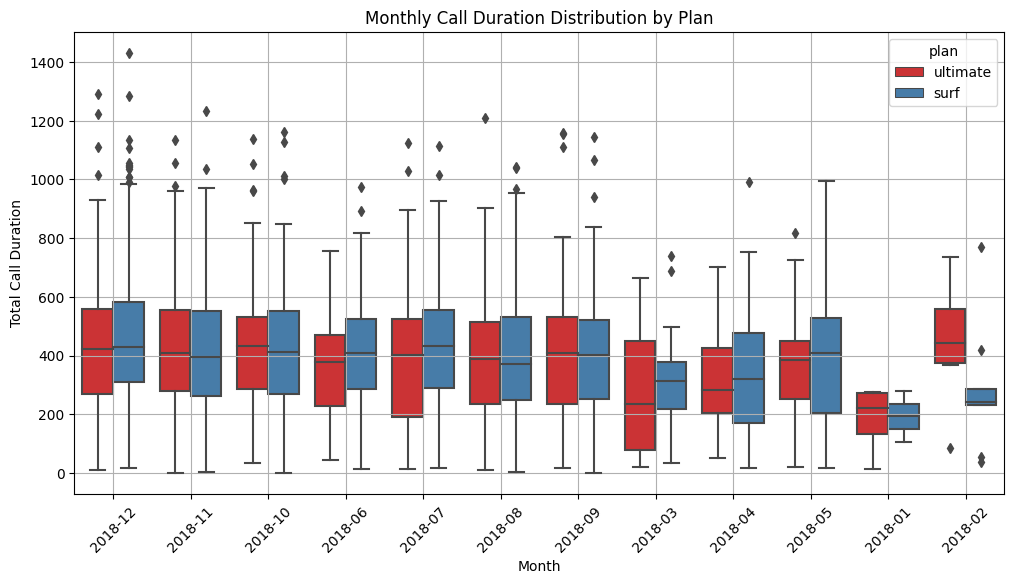

In [33]:
# Plot a boxplot to visualize the distribution of the monthly call duration

plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df3, x='year_month', y='total_duration', hue='plan', palette='Set1')
plt.title('Monthly Call Duration Distribution by Plan')
plt.xlabel('Month')
plt.ylabel('Total Call Duration')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Great insights ;)
</div>

### Messages

In [34]:
# Compare the number of messages users of each plan tend to send each month

surf_plan_messages = merged_df3[merged_df3['plan'] == 'surf']
avg_surf_messages = surf_plan_messages.groupby('year_month')['messages_count'].mean().reset_index()
avg_surf_messages = avg_surf_messages.rename(columns={'messages_count': 'avg_messages_sent'})

ultimate_plan_messages = merged_df3[merged_df3['plan'] == 'ultimate']
avg_ultimate_messages = ultimate_plan_messages.groupby('year_month')['messages_count'].mean().reset_index()
avg_ultimate_messages = avg_ultimate_messages.rename(columns={'messages_count': 'avg_messages_sent'})

avg_surf_messages['plan'] = 'surf'
avg_ultimate_messages['plan'] = 'ultimate'

display(avg_surf_messages.round(2))
display(avg_ultimate_messages.round(2))

,year_month,avg_messages_sent,plan
0,2018-01,21.00,surf
1,2018-02,21.60,surf
2,2018-03,21.94,surf
3,2018-04,24.17,surf
4,2018-05,33.02,surf
5,2018-06,33.62,surf
6,2018-07,35.95,surf
7,2018-08,37.60,surf
8,2018-09,39.52,surf
9,2018-10,42.43,surf


,year_month,avg_messages_sent,plan
0,2018-01,20.67,ultimate
1,2018-02,25.17,ultimate
2,2018-03,34.71,ultimate
3,2018-04,28.94,ultimate
4,2018-05,44.33,ultimate
5,2018-06,36.29,ultimate
6,2018-07,41.21,ultimate
7,2018-08,47.93,ultimate
8,2018-09,45.90,ultimate
9,2018-10,46.98,ultimate


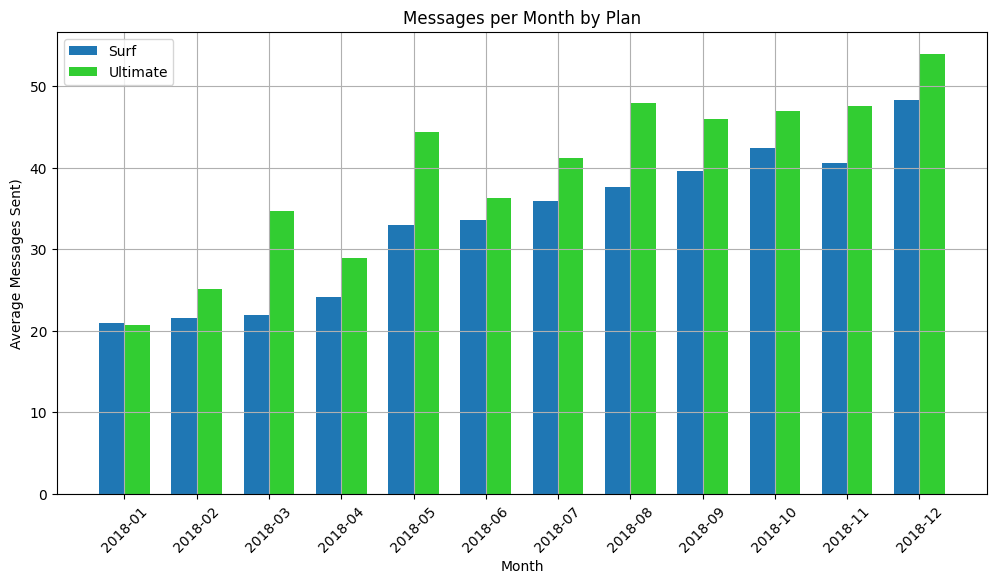

In [35]:
bar_width = 0.35

r1 = np.arange(len(avg_surf_duration))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(12, 6))

# Plot for surf
plt.bar(r1, avg_surf_messages['avg_messages_sent'], width=bar_width, label='Surf')

# Plot for ultimate
plt.bar(r2, avg_ultimate_messages['avg_messages_sent'], width=bar_width, label='Ultimate', color='limegreen')

plt.xlabel('Month')
plt.ylabel('Average Messages Sent)')
plt.title('Messages per Month by Plan')
plt.xticks([r + bar_width/2 for r in range(len(r1))], avg_surf_duration['year_month'].astype(str), 
           rotation=45)
plt.legend()
plt.grid()
plt.show()

<b> Descriptive Statistics for Messages (Surf Plan) </b>

In [36]:
surf_plan_messages = merged_df3[merged_df3['plan'] == 'surf']
surf_plan_messages[['messages_count']].describe().round(2)

,messages_count
count,1222.00
mean,40.11
std,33.04
min,1.00
25%,16.00
50%,32.00
75%,54.00
max,266.00


<b> Descriptive Statistics for Messages (Ultimate Plan) </b>

In [37]:
ultimate_plan_messages = merged_df3[merged_df3['plan'] == 'ultimate']
ultimate_plan_messages[['messages_count']].describe().round(2)

,messages_count
count,584.00
mean,46.30
std,32.94
min,1.00
25%,21.00
50%,41.00
75%,66.00
max,166.00


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    <b>   Student's comment: </b> <b> Observations on Messages and users behavior </b>

<b>According to this bar chart:</b> 

**1.** Users of the Ultimate plan send more messgaes on avergae for 11 out of the 12 months of the 
year than users of the Surf plan. However in the descriptive statistics obtained using the describe() method the total amount of messages sent by surf plan users is higher than the amount of messages sent by the ultimate plan users (1222 to 586 respectively)

**2.** It is celarly seen on the graphic that users of the ultimate plan send more messages on average per month, this is most likely because of the amount of messaes included in the plan package and the lower cost 
of every extra message sent after the limit
is reached. 
    
</div>

In [38]:
# Compare the amount of internet traffic consumed by users per plan

surf_plan_internet = merged_df3[merged_df3['plan'] == 'surf']
avg_surf_internet = surf_plan_internet.groupby('year_month')['internet_used'].mean().reset_index()
avg_surf_internet = avg_surf_internet.rename(columns={'internet_used': 'avg_internet_used'})

ultimate_plan_internet = merged_df3[merged_df3['plan'] == 'ultimate']
avg_ultimate_internet = ultimate_plan_internet.groupby('year_month')['internet_used'].mean().reset_index()
avg_ultimate_internet = avg_ultimate_internet.rename(columns={'internet_used': 'avg_internet_used'})

avg_surf_internet['plan'] = 'surf'
avg_ultimate_internet['plan'] = 'ultimate'

display(avg_surf_internet.round(2))
display(avg_ultimate_internet.round(2))

,year_month,avg_internet_used,plan
0,2018-01,4874.86,surf
1,2018-02,12178.84,surf
2,2018-03,13345.44,surf
3,2018-04,12228.78,surf
4,2018-05,14119.73,surf
5,2018-06,15623.67,surf
6,2018-07,16923.46,surf
7,2018-08,17112.22,surf
8,2018-09,16677.40,surf
9,2018-10,17533.28,surf


,year_month,avg_internet_used,plan
0,2018-01,6918.09,ultimate
1,2018-02,17128.81,ultimate
2,2018-03,18321.52,ultimate
3,2018-04,16121.65,ultimate
4,2018-05,16624.48,ultimate
5,2018-06,15337.92,ultimate
6,2018-07,16344.74,ultimate
7,2018-08,17814.72,ultimate
8,2018-09,16969.87,ultimate
9,2018-10,17780.29,ultimate


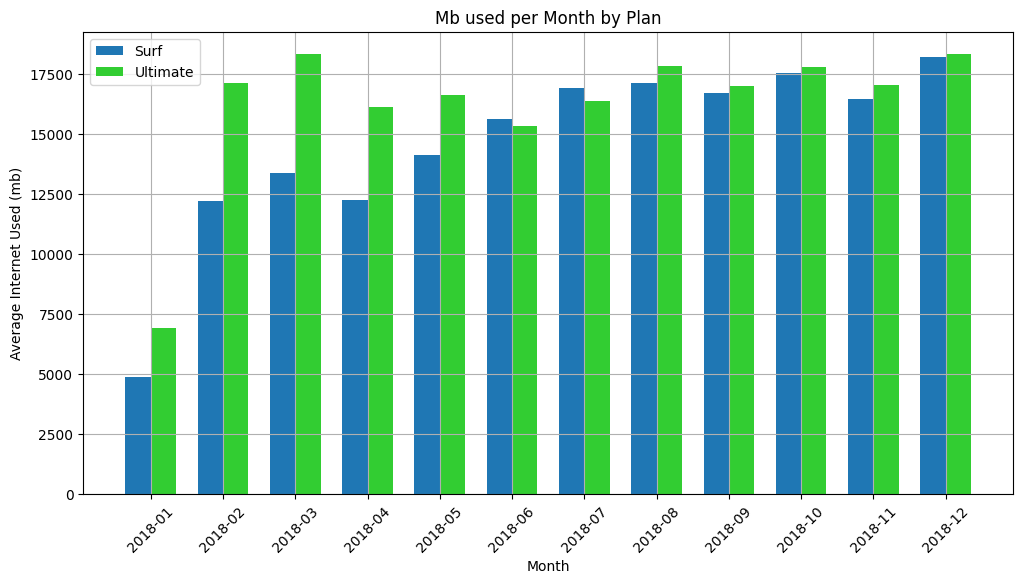

In [39]:
r1 = np.arange(len(avg_surf_internet))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(12, 6))

# Plot for surf
plt.bar(r1, avg_surf_internet['avg_internet_used'], width=bar_width, label='Surf')

# Plot for ultimate
plt.bar(r2, avg_ultimate_internet['avg_internet_used'], width=bar_width, label='Ultimate', color='limegreen')

plt.xlabel('Month')
plt.ylabel('Average Internet Used (mb)')
plt.title('Mb used per Month by Plan')
plt.xticks([r + bar_width/2 for r in range(len(r1))], avg_surf_internet['year_month'].astype(str), 
           rotation=45)
plt.legend()
plt.grid()
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Great insights ;)
</div>

### Internet

<b> Descriptive Statistics for Internet (Surf Plan) </b>

In [40]:
surf_plan_internet = merged_df3[merged_df3['plan'] == 'surf']
surf_plan_internet[['internet_used']].describe().round(2)

,internet_used
count,1558.00
mean,16717.70
std,7884.68
min,92.31
25%,12187.96
50%,16923.83
75%,21039.86
max,70931.59


<b> Descriptive Statistics for Internet (Ultimate Plan) </b>

In [41]:
ultimate_plan_internet = merged_df3[merged_df3['plan'] == 'ultimate']
ultimate_plan_internet[['internet_used']].describe().round(2)

,internet_used
count,719.00
mean,17238.64
std,7831.02
min,233.17
25%,12671.13
50%,16863.45
75%,21025.16
max,46595.33


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    <b>   Student's comment: </b> <b> Observations and Conclusions on clients behavior using internet </b>

<b>According to the graphic and statistical descriptions above:</b> 

**1.** Users of the Ultimate plan spend more time and megabytes on average than users of the surf plan,
During 10 months of the year ultimate plan clients surpass the amount of GB used by surf plan clients. 

**2.** None of the ultimate plan users exceeded the internet package limit.
    
**3.** The average intenert used by surf plan clients (16717.70) exceeded the package limit (15360), which is important to note given the amount charged (10 usd) after the internet limit is reached, which becomes a source of profit for the company.
    
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Great insights ;)
</div>

## Revenue

In [42]:
avg_plan_monthly_rev = merged_df3.groupby(['year_month', 'plan'])['revenue'].mean().reset_index()
display(avg_plan_monthly_rev.round(2))

,year_month,plan,revenue
0,2018-01,surf,20.00
1,2018-01,ultimate,70.00
2,2018-02,surf,33.00
3,2018-02,ultimate,70.00
4,2018-03,surf,43.58
5,2018-03,ultimate,73.39
6,2018-04,surf,38.78
7,2018-04,ultimate,72.77
8,2018-05,surf,45.35
9,2018-05,ultimate,70.52


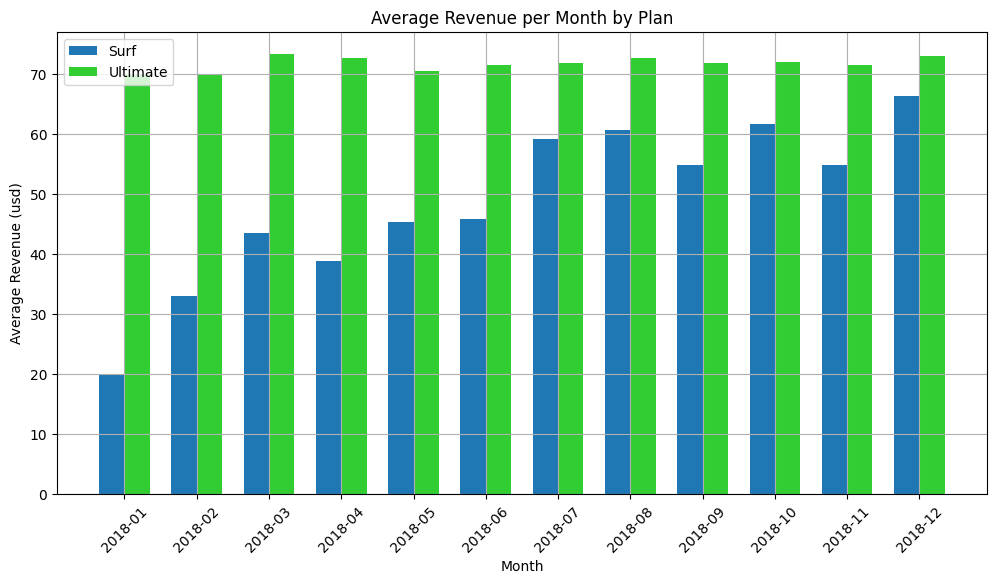

In [43]:
r1 = np.arange(len(avg_plan_monthly_rev) / 2)
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(12, 6))

# Plot for surf
plt.bar(r1, avg_plan_monthly_rev[avg_plan_monthly_rev['plan'] == 'surf']['revenue'], width=bar_width, label='Surf')

# Plot for ultimate
plt.bar(r2, avg_plan_monthly_rev[avg_plan_monthly_rev['plan'] == 'ultimate']['revenue'], width=bar_width, label='Ultimate', color='limegreen')

plt.xlabel('Month')
plt.ylabel('Average Revenue (usd)')
plt.title('Average Revenue per Month by Plan')
plt.xticks([r + bar_width/2 for r in range(len(r1))], 
           avg_plan_monthly_rev[avg_plan_monthly_rev['plan'] == 'ultimate']['year_month'].astype(str), 
           rotation=45)
plt.legend()
plt.grid()
plt.show()

In [44]:
plan_monthly_rev = merged_df3.groupby(['year_month', 'plan'])['revenue'].sum().reset_index()
display(plan_monthly_rev)

,year_month,plan,revenue
0,2018-01,surf,40.00
1,2018-01,ultimate,280.00
2,2018-02,surf,297.03
3,2018-02,ultimate,490.00
4,2018-03,surf,1002.31
5,2018-03,ultimate,880.71
6,2018-04,surf,1938.88
7,2018-04,ultimate,1528.20
8,2018-05,surf,3491.69
9,2018-05,ultimate,2044.96


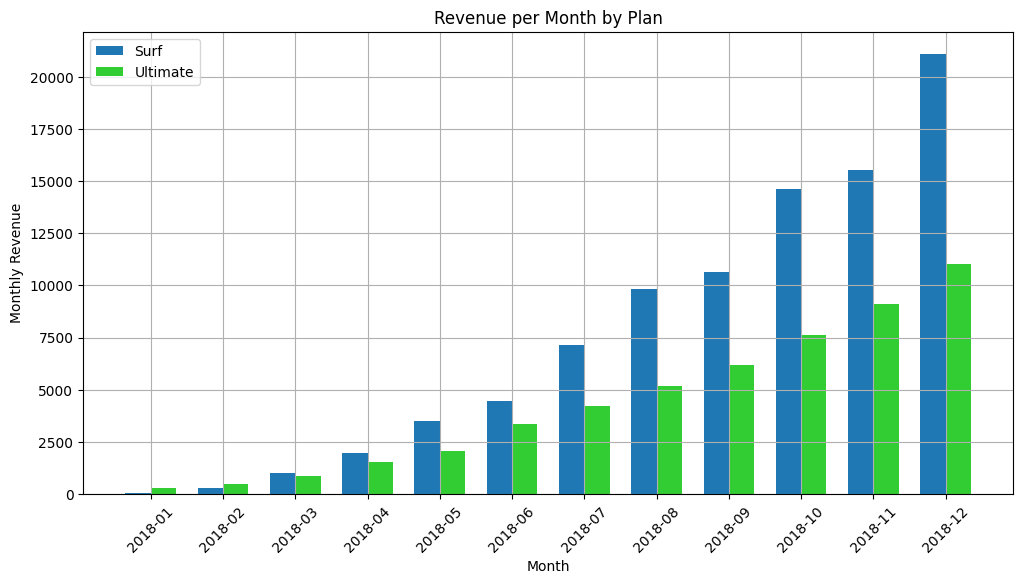

In [45]:
r1 = np.arange(len(plan_monthly_rev) / 2)
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(12, 6))

# Plot for surf
plt.bar(r1, plan_monthly_rev[plan_monthly_rev['plan'] == 'surf']['revenue'], width=bar_width, label='Surf')

# Plot for ultimate
plt.bar(r2, plan_monthly_rev[plan_monthly_rev['plan'] == 'ultimate']['revenue'], width=bar_width, label='Ultimate', color='limegreen')

plt.xlabel('Month')
plt.ylabel('Monthly Revenue')
plt.title('Revenue per Month by Plan')
plt.xticks([r + bar_width/2 for r in range(len(r1))], 
           plan_monthly_rev[plan_monthly_rev['plan'] == 'ultimate']['year_month'].astype(str), 
           rotation=45)
plt.legend()
plt.grid()
plt.show()

<b> Descriptive Statistics for Revenue (Surf Plan) </b>

In [46]:
surf_plan_revenue = merged_df3[merged_df3['plan'] == 'surf']
surf_plan_revenue[['revenue']].describe().round(2)

,revenue
count,1573.00
mean,57.29
std,53.74
min,20.00
25%,20.00
50%,36.68
75%,76.85
max,581.33


<b> Descriptive Statistics for Revenue (Ultimate Plan) </b>

In [47]:
ultimate_plan_revenue = merged_df3[merged_df3['plan'] == 'ultimate']
ultimate_plan_revenue[['revenue']].describe().round(2)

,revenue
count,720.00
mean,72.12
std,10.77
min,70.00
25%,70.00
50%,70.00
75%,70.00
max,178.52


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Any insights you get from this?
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    <b>   Student's comment: </b> 

<b>Observations on statistical descriptions for plan revenue above:</b> 
    
The describe() method gives us useful information about the average revenue each plan brings to the 
the company, like we can see the average ultimate users pay is still higher than the average revenue 
for surf users even though they go over the package limits more often than not. Making the 
ultimate plan look like the better option for the company to advertise overall. 

</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment Iter 2</b>

Great, thanks!
</div>

## Test statistical hypotheses

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Please use markdown here to describe and define each hypothesis
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    <b>   Student's comment: </b> 

<b>Testing the hypothesis:</b> 

The hypothesis is that the average revenue from users of the Ultimate and Surf calling plans differs significantly, for this I used the <b>merged_df3</b> data frame containing all the important data needed for this: <b>the plan and the revenue values</b> and setting the critical statistical significance level
(alpha=0.05) to test the hypothesis and decided wether is rejected or not. 

    
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment Iter 2</b>

You must define H0 = "..." and H1 = "..." explicitly.
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    <b>   Student's comment: </b> 

<b>Testing the hypothesis:</b> 

<b>Null Hypothesis H0</b> = The average revenue from users of the Ultimate and Surf calling plans differs.

<b>Alternative Hypothesis H1</b> = The average revenue from users of the Ultimate and Surf calling plans does not differ.

</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment Iter 3</b>

Great job, thanks!
</div>

In [48]:
# Test the hypotheses

surf_revenue = merged_df3.loc[merged_df3['plan'] == 'surf', 'revenue']
ultimate_revenue = merged_df3.loc[merged_df3['plan'] == 'ultimate', 'revenue']
alpha = 0.05
results = st.ttest_ind(surf_revenue, ultimate_revenue)

print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  3.0939690152510683e-13
We reject the null hypothesis


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Correct
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Please use markdown here to describe and define each hypothesis
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    <b>   Student's comment: </b> 

<b>Testing the hypothesis:</b> 

In this case the hypothesis is that the average revenue from users in the NY-NJ area is different from that of the users from the other regions, for this I once again used the <b>merged_df3</b> data frame since it contains the relevant data needed for this: <b>the plan, the city(area) and the revenue values</b> and setting the critical statistical significance level
(alpha=0.05) to test the hypothesis and decided wether is rejected or not. 

    
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment Iter 2</b>

You must define H0 = "..." and H1 = "..." explicitly.
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    <b>   Student's comment: </b> 

<b>Testing the hypothesis:</b> 

<b>Null Hypothesis H0</b> = The average revenue from users in the NY-NJ area is the <b>same</b> as the revenue from users in other regions.

<b>Alternative Hypothesis H1</b> = The average revenue from users in the NY-NJ area <b>differs</b> from the revenue from users in other regions.

</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment Iter 3</b>

Great job, thanks!
</div>

In [49]:
# Test the hypotheses

ny_nj_revenue = merged_df3.loc[merged_df3['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'revenue']
other_revenue = merged_df3.loc[merged_df3['city'] != 'NY-NJ', 'revenue']

results = st.ttest_ind(ny_nj_revenue, other_revenue)
alpha = 0.05
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis (The average revenue from users in the NY-NJ area differs from that of the users in other regions)")
else:
    print("We can't reject the null hypothesis (There is no significant difference between users in NY, NJ and users in other regions)")

p-value: 0.05716619750725447
We can't reject the null hypothesis (There is no significant difference between users in NY, NJ and users in other regions)


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Correct
</div>

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    <b>   Student's comment: </b>
    
<b>Final Conclusions:</b> 

**1.** Based on the 50 usd diffrence between plan pirces, with the ultimate plan being the more expensive
one at 70 usd, the initial assumption is that this plan brings more revenue for the Megaline company,
however further analysis indicates that clients of the surf plan often exceed the package limits for 
calls messages and internet, the latter being the most significant one in terms of profit.

**2.** The graphics for the monthly average revenue for each plan, show that ultimately, surf plan users
end up paying more than the 20 usd the plan costs.Users of this plan paid on average 57 usd a month,
37 usd more than the initial price.
    
**3.** Users of the ultimate plan paid on average, 72.12 usd only 2.12 usd more than the set price.
This might be due to the amount of internet minutes and messgaes they get per package, which is a lot
higher than those inclused in the surf plan, therefore making it harder for clients of the ultimate
plan to go over the limit. 

**4.** The hypothesis that there is a difference between plan revenues is rejected, this is backed up by the fact that even though surf users pay more on average per month, they do not surpass the amount paid by ultimate plan users. 
    
**5.** The analysis leads to the conclusion that the company should advertise the ultimate plan more, 
in order to encourage clients to use internet (since it is the monst significan source of extra profit).

</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Nice conclusion ;)
</div>